In [1]:
import numpy as np
import open3d as o3d
import copy
import csv
from matplotlib import pyplot as plt
from open3d import visualization

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [8]:
#FOR TUM DATASET
x = [] #dvs pixel x in mm
y = [] #dvs pixel y in mm
depth = [] #depth from depth sensor
time_stamp = [] 
x_pixel = [] #dvs pixel x in mm
y_pixel = [] #dvs pixel y 


#events.tsv: A TSV file where each row corresponds to one event.
# Provided data is: PrimeSense image coordinates (x,y), PrimeSense depth measurement,
# EDVS image coordinates (x,y), Timestamp (in microsenconds), EDVS parity flag

with open('/home/bru/Dev/DATA/scn2c_take01/take01/events.csv', encoding="Latin-1") as csvfile:  #change this according to your file 
    reader = list(csv.reader(csvfile))
    
#DVS = []
num_events = len(reader)
num_events_batch = 6000 
import pandas as pd

for i in range(0,num_events):
    depth.append((reader[i][2]))
    x.append(((int(reader[i][3])/128)-0.5)*1000) # convert x_pixels to x in millimeters (according to camera intrinsics of DAVIS128) K = [128, 0, 64; 0, 128, 64; 0, 0, 1]
    y.append(((int(reader[i][4])/128)-0.5)*1000) # convert y_pixels to y in millimeters
    x_pixel.append(int(reader[i][3])) 
    y_pixel.append(int(reader[i][4]))
    time_stamp.append((reader[i][5]))
    

In [9]:
def is_identity_matrix(matrix):
    return np.allclose(matrix, np.eye(matrix.shape[0]))

def get_transformation_matrix(source, target, threshold = 1.0):
    reg_p2p = o3d.pipelines.registration.registration_icp(
        source, target, max_correspondence_distance, trans_init,
        o3d.pipelines.registration.TransformationEstimationPointToPoint(),
        o3d.pipelines.registration.ICPConvergenceCriteria(max_iteration=3000))
    return reg_p2p #.transformation
   


Non-identity transformation from frame 0 to 1: 
[[ 9.99995665e-01  9.12625515e-04  2.79965908e-03 -4.25961264e+00]
 [-9.03512594e-04  9.99994296e-01 -3.25455065e-03 -3.71866376e+00]
 [-2.80261329e-03  3.25200701e-03  9.99990785e-01 -7.32764798e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Non-identity transformation from frame 1 to 2: 
[[ 9.99998192e-01 -9.52997916e-04 -1.64553944e-03  3.58309331e+00]
 [ 9.50695878e-04  9.99998569e-01 -1.39917211e-03  2.97538419e-01]
 [ 1.64687049e-03  1.39760517e-03  9.99997667e-01 -9.06939476e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Non-identity transformation from frame 2 to 3: 
[[ 9.99997122e-01  2.14503118e-03  1.07460883e-03 -4.77558266e+00]
 [-2.14314824e-03  9.99996172e-01 -1.75030551e-03 -3.55262520e+00]
 [-1.07835918e-03  1.74799743e-03  9.99997891e-01 -7.68169297e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Non-identity transformation from frame 3 to 4: 
[

Non-identity transformation from frame 26 to 27: 
[[ 9.99985610e-01 -4.46898609e-03  2.96781229e-03  5.58572764e+00]
 [ 4.47812566e-03  9.99985230e-01 -3.08009195e-03  1.83667138e+01]
 [-2.95400357e-03  3.09333786e-03  9.99990853e-01 -2.92250464e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Non-identity transformation from frame 27 to 28: 
[[ 9.99868330e-01 -1.54364967e-02  5.00373936e-03 -6.26507726e+00]
 [ 1.54698449e-02  9.99857914e-01 -6.69589670e-03  2.31965146e+01]
 [-4.89966721e-03  6.77242212e-03  9.99965063e-01  4.03707960e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Non-identity transformation from frame 28 to 29: 
[[ 9.99948550e-01 -8.13680987e-03  6.05723236e-03 -3.29720594e+00]
 [ 8.19198803e-03  9.99924663e-01 -9.14108652e-03  2.20003903e+01]
 [-5.98239674e-03  9.19023698e-03  9.99939873e-01 -4.18737379e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Non-identity transformation from frame 29 t

Non-identity transformation from frame 53 to 54: 
[[ 9.99990517e-01 -2.44759268e-03  3.60204955e-03 -1.33713951e+01]
 [ 2.45780233e-03  9.99992967e-01 -2.83270890e-03 -1.39646556e+01]
 [-3.59509091e-03  2.84153517e-03  9.99989500e-01 -4.19585949e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Non-identity transformation from frame 54 to 55: 
[[ 9.99990839e-01 -3.07644272e-03  2.97620494e-03 -1.02225006e+01]
 [ 3.08159085e-03  9.99993761e-01 -1.72672598e-03 -1.61926118e+01]
 [-2.97087420e-03  1.73588160e-03  9.99994080e-01 -2.94062844e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Non-identity transformation from frame 55 to 56: 
[[ 9.99979767e-01 -5.36449966e-03  3.41870479e-03 -1.09113921e+01]
 [ 5.36298040e-03  9.99985516e-01  4.53410458e-04 -1.63911980e+01]
 [-3.42108760e-03 -4.35066837e-04  9.99994053e-01  2.05157642e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Non-identity transformation from frame 56 t

Non-identity transformation from frame 80 to 81: 
[[ 9.99994355e-01  3.30196240e-03  6.22220934e-04  7.29357494e-01]
 [-3.30366898e-03  9.99990729e-01  2.76195255e-03 -2.25361201e+01]
 [-6.13095302e-04 -2.76399257e-03  9.99995992e-01  2.55976841e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Non-identity transformation from frame 81 to 82: 
[[ 9.99995627e-01  2.95603695e-03 -9.16253540e-05 -2.35816177e-01]
 [-2.95592810e-03  9.99994951e-01  1.16620586e-03 -1.98464017e+01]
 [ 9.50722390e-05 -1.16592992e-03  9.99999316e-01  5.03451201e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Non-identity transformation from frame 82 to 83: 
[[ 9.99985363e-01  3.61349765e-03 -4.02688522e-03  4.62535849e+00]
 [-3.59722315e-03  9.99985363e-01  4.04140217e-03 -2.37713586e+01]
 [ 4.04142988e-03 -4.02685741e-03  9.99983725e-01  9.82937960e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Non-identity transformation from frame 83 t

Non-identity transformation from frame 106 to 107: 
[[ 9.99992722e-01  3.79561452e-03  3.86757351e-04 -2.26507160e-01]
 [-3.79816796e-03  9.99969459e-01  6.83042257e-03 -1.04826859e+00]
 [-3.60819888e-04 -6.83184183e-03  9.99976598e-01 -3.25944058e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Non-identity transformation from frame 107 to 108: 
[[ 9.99999553e-01 -2.28517530e-05  9.45291215e-04 -2.83847226e-01]
 [ 1.61027562e-05  9.99974517e-01  7.13898704e-03  1.70573949e+00]
 [-9.45430264e-04 -7.13896863e-03  9.99974070e-01 -1.15603598e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Non-identity transformation from frame 108 to 109: 
[[ 9.99962853e-01 -8.18970500e-03 -2.68735069e-03  8.33425533e+00]
 [ 8.20497898e-03  9.99949963e-01  5.72272613e-03 -2.70251447e+00]
 [ 2.64034879e-03 -5.74456320e-03  9.99980014e-01 -1.55401517e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Non-identity transformation from fram

Non-identity transformation from frame 132 to 133: 
[[ 9.99998976e-01 -1.14910818e-03  8.52822512e-04  9.74324497e+00]
 [ 1.14944085e-03  9.99999263e-01 -3.89685721e-04 -6.69860502e+00]
 [-8.52374093e-04  3.90665591e-04  9.99999560e-01 -7.01578596e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Non-identity transformation from frame 133 to 134: 
[[ 9.99998235e-01 -1.69367967e-03 -8.13834576e-04  1.71779580e+01]
 [ 1.69568056e-03  9.99995526e-01  2.46422331e-03 -5.78589940e+00]
 [ 8.09657330e-04 -2.46559896e-03  9.99996633e-01 -1.02344058e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Non-identity transformation from frame 134 to 135: 
[[ 9.99998433e-01  6.34763039e-04  1.65231035e-03  8.21453146e+00]
 [-6.34600729e-04  9.99999794e-01 -9.87546630e-05 -6.96522166e+00]
 [-1.65237270e-03  9.77059509e-05  9.99998630e-01 -8.77540043e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Non-identity transformation from fram

Non-identity transformation from frame 159 to 160: 
[[ 9.99981688e-01 -5.71358913e-03 -1.99438695e-03  1.57336466e+01]
 [ 5.71503272e-03  9.99983411e-01  7.18880589e-04 -1.57702383e+00]
 [ 1.99024647e-03 -7.30265412e-04  9.99997753e-01  2.05094844e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Non-identity transformation from frame 160 to 161: 
[[ 9.99990646e-01 -4.28491101e-03 -5.89197590e-04  8.82374175e+00]
 [ 4.28382250e-03  9.99989138e-01 -1.83646098e-03 -2.09489366e+00]
 [ 5.97060263e-04  1.83391978e-03  9.99998140e-01  1.86482968e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Non-identity transformation from frame 161 to 162: 
[[ 9.99994589e-01 -2.85551018e-03 -1.63367661e-03  1.03925264e+01]
 [ 2.85553595e-03  9.99995923e-01  1.34407178e-05 -5.93623140e+00]
 [ 1.63363157e-03 -1.81056674e-05  9.99998665e-01 -2.32164210e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Non-identity transformation from fram

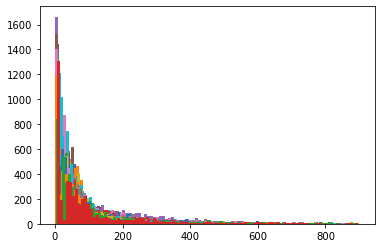

In [10]:
x_pos = []
y_pos = []
z_pos = []
x_rot = []
y_rot = []
z_rot = []
T_rest = np.identity(4)
T_new = []
T_orj = []
iEv = 0 #num event
iBatch = 0 #num batch
data_size = (num_events_batch ,3) 
last_used_index = 0
while True:
    # Check if we have processed all events
    if (iEv + num_events_batch > num_events):
        break
        
    # Select subset of events or data
    
    depth_batch = np.array(depth[iEv+0:iEv+num_events_batch])
    x_batch = np.array(x[iEv+0:iEv+num_events_batch])
    y_batch = np.array(y[iEv+0:iEv+num_events_batch])
    
    batches = (np.c_[x_batch,y_batch, depth_batch]).astype(np.float64)
    
    ##Save .ply files
    #filename = "scn3_take07/point_clouds/depth_event_%08d.ply" %iBatch
    #write_text = True
    #save_ply(batches, write_text, filename)
        
    iEv += num_events_batch
    iBatch += 1
    
    source = o3d.io.read_point_cloud("/home/bru/Dev/DATA/scn2c_take01/take01/point_clouds/depth_event_%08d.ply" % last_used_index)
    max_correspondence_distance = 30   # mm, for ICP
    trans_init = np.identity(4) #for ICP to initialize transformation matrix might be changed to see how robust the algorithm is??    
    def get_transformation_matrix(source, target, threshold = 1.0):
        reg_p2p = o3d.pipelines.registration.registration_icp(
            source, target, max_correspondence_distance, trans_init,
            o3d.pipelines.registration.TransformationEstimationPointToPoint(),
            o3d.pipelines.registration.ICPConvergenceCriteria(max_iteration=3000))
        return reg_p2p #.transformation
    
    for i in range(last_used_index + 1, iBatch):
        target = o3d.io.read_point_cloud("/home/bru/Dev/DATA/scn2c_take01/take01/point_clouds/depth_event_%08d.ply" % i)    
        reg_p2p = get_transformation_matrix(source, target)
        transformation_matrix = reg_p2p.transformation
        
    
        if not is_identity_matrix(transformation_matrix):
            # Process this frame as it has a non-identity transformation matrix
            print("Non-identity transformation from frame {} to {}: \n{}".format(last_used_index, i, transformation_matrix))

            # Update the last used point cloud and its index to this one
            last_used_index = i
            
        else:
            # Skip this frame as it has an identity transformation matrix
            print("Skipping frame {} due to identity transformation with frame {}".format(i, last_used_index))
        
        T = reg_p2p.transformation
    
        target_pred = source.transform(T) 
    #prediction of transformation of source to produce target
    #print(np.asarray(target_pred.points).shape)
        idx_source = np.asarray(reg_p2p.correspondence_set)[:,0] #which points are aligned in source with target 
        idx_target = np.asarray(reg_p2p.correspondence_set)[:,1]
    #print(idx_source.shape,idx_target.shape)
        A = np.array(reg_p2p.correspondence_set)
    #print(A.shape)
    #print(idx_source)
    #print(idx_source.shape)
        target_pred_inliers = np.asarray(target_pred.points)[idx_source,:] #predicted inliers
        target_inliers = np.asarray(target.points)[idx_target,:] #real inliers
        error_xyz = target_pred_inliers-target_inliers
    #print(error_xyz)
        error_per_correspondence = np.sum(error_xyz*error_xyz,1)
        fig = plt.hist(error_per_correspondence, bins=100) #, label='scene3/take07 histogram')
    #fig.suptitle('scene3/take07 histogram', fontsize=40)
    
    
    #print(np.sqrt(np.mean(np.sum(error_xyz*error_xyz,1))))
    #print(error_xyz,error_xyz.shape) 
   
    #read x,y_depth values from depth_event txt file
        iEv = i*num_events_batch
    #depth_batch = np.array(depth[iEv+0:iEv+num_events_batch])
        xp_batch = np.array(x_pixel[iEv+0:iEv+num_events_batch])
        yp_batch = np.array(y_pixel[iEv+0:iEv+num_events_batch])
    #print(xp_batch.shape,yp_batch)  
    #combine x,y-depth with error call plot error alignment image
        img_size = (130, 130)
        img = np.zeros(img_size, int) #np.array
        count = np.zeros(img_size, int)
    #print(len(T_orj))


        T_rest = np.dot(T_rest, T)
    #print("r",T_rest)
        T_new.append(T_rest)
    
        x_pos.append((T_rest[0][3]))
        y_pos.append((T_rest[1][3]))
        z_pos.append((T_rest[2][3]))
 
    #T_iterative = np.append(T_iterative , new).reshape((iteration+1,4,4))
    #print((T_iterative_list.shape))
        pos = (np.c_[x_pos,y_pos,z_pos]).astype(np.float64)

print("done")


In [16]:
x_gt = []
y_gt = []
z_gt = []
x_rot = []
y_rot = []
z_rot = []

with open('/home/bru/Dev/DATA/scn2c_take01/take01/gt.csv', encoding="Latin-1") as csvfile:
    reader = list(csv.reader(csvfile, delimiter=','))

num_data = len(reader)
print("num_data:",num_data)

reader = np.array(reader).astype(np.float64)

for i in range(1,num_data):
    reader[i][0] = (reader[i][0])-(reader[0][0])
    reader[i][1] = (reader[i][1])-(reader[0][1])
    reader[i][2] = (reader[i][2])-(reader[0][2])
    x_gt.append((reader[i][0]))
    y_gt.append((reader[i][1]))
    z_gt.append((reader[i][2]))
    z_rot.append((reader[i][3]))
    x_rot.append((reader[i][4]))
    y_rot.append((reader[i][5]))
    

x_gt = (np.array(x_gt).astype(np.float64))/10000
y_gt = (np.array(y_gt).astype(np.float64))/10000
z_gt = (np.array(z_gt).astype(np.float64))/10000
    

num_data: 2299


In [17]:
import matplotlib.pyplot as plt
import plotly.express as px
color = np.zeros(len(x_pos),int)
color[0] = 1
size = np.zeros(len(x_pos),int)
size[0] = 1

color_gt = np.zeros(len(x_gt),int)
color[0] = 1
size_gt = np.zeros(len(x_gt),int)
size[0] = 1
#fig = plt.figure(figsize=(30, 30))
#ax = fig.add_subplot(projection='3d')
dataset = pd.DataFrame({'x': x_pos, 'y': y_pos, 'z': z_pos, 'c': color, 's': size})
dataset_gt = pd.DataFrame({'x_gt': x_gt, 'y_gt': y_gt, 'z_gt': z_gt, 'c_gt': color_gt, 's_gt': size_gt})

fig = px.scatter_3d(dataset, x = 'x',
                    y = 'y',
                    z= 'z', 
                    color='c')#, size='s')
fig = px.scatter_3d(dataset_gt, x = 'x_gt',
                    y = 'y_gt',
                    z = 'z_gt', 
                    color='c_gt')
#fig = px.scatter_3d(x = dataset['x'[0]], y = dataset['y'[0]], z= dataset['z'[0]])
fig.update_traces(marker_size = 1)
fig.show()

In [5]:
#ADD GROUND TRUTH DATA TO ABOVE GRAPH!!
#HİSTOGRAM TAM NE İŞE YARIYOR ANLAMAN LAZIM